# Pymaceuticals Inc.
---

### Analysis

1. The bar graph shows that the Drug Regimen Capomulin has the maximum mice number (230), and Zoniferol has the smaller mice number (182).By removing duplicates the total number of mice is 248. The total count of mice by gender also showed that 124 female mice and 125 male mice.
2. When the mouse weight increases the average tumor volume also increases.
3. From the selected treatments Capomulin and Ramicane reduces the size of tumors better.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
pymaceuticals_data = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
pymaceuticals_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [5]:
# Checking the number of mice.
duplicate = pymaceuticals_data[pymaceuticals_data.duplicated()]
duplicate["Mouse ID"]

137    g989
Name: Mouse ID, dtype: object

In [30]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupmouse = merged_study.loc[merged_study.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
dupmouse

array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID
pymaceuticals_data_duplicate=pd.DataFrame(pymaceuticals_data.loc[pymaceuticals_data["Mouse ID"]=="g989",:])
pymaceuticals_data_duplicate=pymaceuticals_data_duplicate.sort_values(["Timepoint"], ascending=True)
pymaceuticals_data_duplicate

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
pymaceuticals_data_clean=pymaceuticals_data.drop(pymaceuticals_data.loc[pymaceuticals_data["Mouse ID"] == "g989", :].index)
pymaceuticals_data_clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
# Checking the number of mice in the clean DataFrame.
clean_total_mice=pymaceuticals_data_clean["Mouse ID"].nunique()
clean_total_mice

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

# mean
mean_tumor_volume=pymaceuticals_data_clean.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()

# median
median_tumor_volume=pymaceuticals_data_clean.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()

# variance
variance_tumor_volume=pymaceuticals_data_clean.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()

# standard deviation
std_tumor_volume=pymaceuticals_data_clean.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()

# SEM
sem_tumor_volume=pymaceuticals_data_clean.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

# summary statistics table
summary_statistics_table = pd.DataFrame({
"Mean Tumor Volume": mean_tumor_volume,
"Median Tumor Volume": median_tumor_volume,
"Tumor Volume Variance": variance_tumor_volume,
"Tumor Volume Std. Dev.": std_tumor_volume,
"Tumor Volume Std. Err.":sem_tumor_volume})
summary_statistics_table


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_agg_statistics_table=pymaceuticals_data_clean.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)" :
                                                               ["mean", "median", "var", "std", "sem"]})
summary_agg_statistics_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

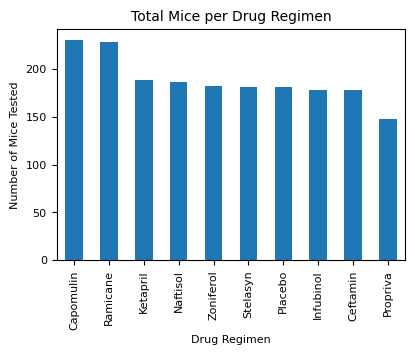

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Make dataframe.
mice_count=pymaceuticals_data_clean["Drug Regimen"].value_counts()
mice_count_dataframe=pd.DataFrame({
"Number of Mice Tested": mice_count})
# using Pandas.
mice_count_dataframe.plot.bar(figsize=(4.5,3), fontsize=8, legend=False)
plt.title("Total Mice per Drug Regimen", fontsize=10)
plt.xlabel("Drug Regimen", fontsize=8)
plt.ylabel("Number of Mice Tested", fontsize=8)
plt.show()

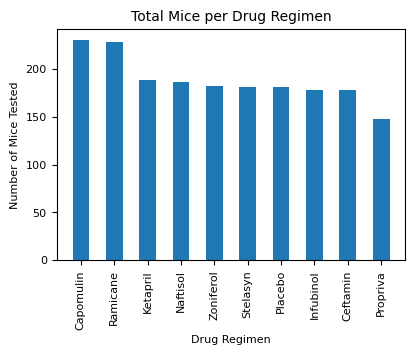

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Create a sample DataFrame
# Generate the bar plot
plt.bar(mice_count_dataframe.index, mice_count, color='tab:blue', alpha=1, align="center", width=.5)
plt.xticks(rotation='vertical', fontsize=8)
plt.yticks(fontsize=8)
plt.title("Total Mice per Drug Regimen", fontsize=10)
plt.xlabel("Drug Regimen", fontsize=8)
plt.ylabel("Number of Mice Tested", fontsize=8)
plt.gcf().set_size_inches(4.5, 3)
plt.show()

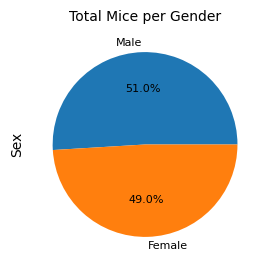

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Make dataframe.
gender_class=pymaceuticals_data_clean["Sex"].value_counts()
gender_sum=pymaceuticals_data_clean["Sex"].count()
gender_result=(gender_class/gender_sum)*100
mice_gender_dataframe=pd.DataFrame({
"Sex": gender_result})

mice_gender_dataframe.plot.pie(y="Sex", figsize=(3, 3), legend=False, autopct="%1.1f%%", fontsize=8)
plt.title("Total Mice per Gender", fontsize=10)
plt.show()

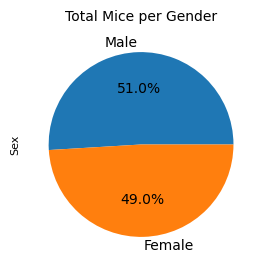

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_class, explode=None, labels=mice_gender_dataframe.index, colors=None, autopct="%1.1f%%")
plt.title("Total Mice per Gender", fontsize=10)
plt.ylabel("Sex", fontsize=8)
plt.gcf().set_size_inches(3, 3)
plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_col = []

druglist=["Capomulin", "Ramicane", "Infubinol","Ceftamin"]
drug_concat = pd.DataFrame(pymaceuticals_data_clean["Mouse ID"].unique()\
                           , columns=["Mouse ID"])
max_mice = pymaceuticals_data_clean.groupby(["Mouse ID","Drug Regimen"])["Timepoint"].max().to_frame().reset_index()
max_mice = max_mice.loc[max_mice["Drug Regimen"].isin(druglist)]
res_df = pd.merge(max_mice,pymaceuticals_data_clean,how="left", on=["Mouse ID","Drug Regimen","Timepoint"])
for drug in druglist:
    spe_drug =res_df.loc[(res_df["Drug Regimen"] == drug)]
    spe_drug_res=spe_drug[["Mouse ID","Tumor Volume (mm3)"]].rename(columns={"Tumor Volume (mm3)":drug})
    drug_concat=pd.merge(drug_concat,spe_drug_res,how="left", on="Mouse ID")
    tumor_col.append(spe_drug["Tumor Volume (mm3)"])

In [21]:
# Put treatments into a list for for loop (and later forregimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset to tumor_vol_list 
# Calculate the IQR and quantitatively
# Determine outliers using upper and lower bounds
# Print out the result
for drug in druglist:
    quartiles=drug_concat[drug].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outlie=drug_concat.loc[(drug_concat[drug] < lower_bound) | (drug_concat[drug] > upper_bound),drug]   
    print(f"{drug}'s potential outliers:{outlie}")    

Capomulin's potential outliers:Series([], Name: Capomulin, dtype: float64)
Ramicane's potential outliers:Series([], Name: Ramicane, dtype: float64)
Infubinol's potential outliers:29    36.321346
Name: Infubinol, dtype: float64
Ceftamin's potential outliers:Series([], Name: Ceftamin, dtype: float64)


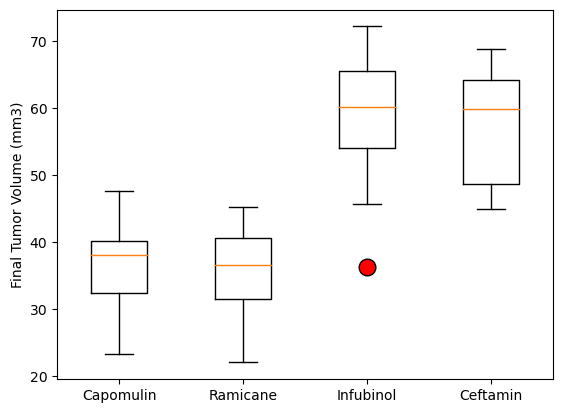

In [22]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Graph boxplots for above data
# Format and label graph
fig, ax1 = plt.subplots()
flierprops = dict(marker="o", markerfacecolor="r", markersize=12,
                  linestyle="none")
ax1.boxplot(tumor_col, flierprops = flierprops)
plt.xticks([1,2,3,4],druglist)
plt.ylabel("Final Tumor Volume (mm3)", fontsize=10)
plt.show()

## Line and Scatter Plots

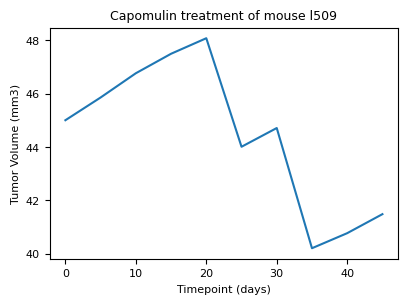

In [23]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
pymaceuticals_data_clean.loc[(pymaceuticals_data_clean["Drug Regimen"]=="Capomulin")]
Capomulin_df = pymaceuticals_data_clean.loc[(pymaceuticals_data_clean["Drug Regimen"]=="Capomulin")]
Capomulin_df.loc[pymaceuticals_data_clean["Mouse ID"]=="l509"]\
.plot.line(x="Timepoint", y="Tumor Volume (mm3)",figsize=(4.5,3),
           fontsize=8, legend=False)
plt.title("Capomulin treatment of mouse l509" ,fontsize=9)
plt.xlabel("Timepoint (days)", fontsize=8)
plt.ylabel("Tumor Volume (mm3)", fontsize=8)
plt.show()

C:\Users\atoth\AppData\Local\Temp\ipykernel_6952\1682883819.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Capomulin_df_mean = Capomulin_df.groupby(["Mouse ID","Age_months"]).mean()


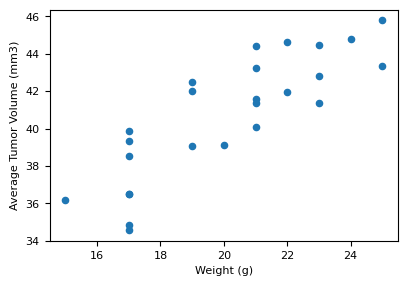

In [24]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Capomulin_df_mean = Capomulin_df.groupby(["Mouse ID","Age_months"]).mean()
Capomulin_df_mean.plot.scatter(x="Weight (g)",y="Tumor Volume (mm3)", figsize=(4.5,3),
           fontsize=8, legend=False)
plt.xlabel("Weight (g)", fontsize=8)
plt.ylabel("Average Tumor Volume (mm3)", fontsize=8)
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


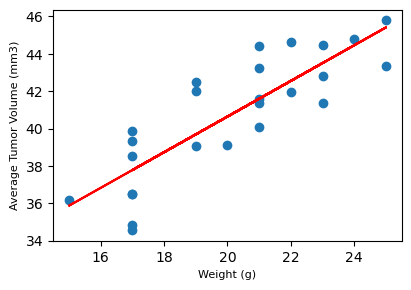

In [25]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress

x_values = Capomulin_df_mean["Weight (g)"]
y_values = Capomulin_df_mean['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=8,color="red")
plt.xlabel("Weight (g)", fontsize=8)
plt.ylabel("Average Tumor Volume (mm3)", fontsize=8)
plt.gcf().set_size_inches(4.5, 3)
print(f"The correlation between mouse weight and the average tumor volume is {round(rvalue,2)}")
plt.show()